In [1]:
print("""The Data Exploration portion will have the following structure:
    1. Inspect overall structure of data
    2. Deal with missing values
    3. Map or decide to dummy categorical variables (actual dummying later)""")

The Data Exploration portion will have the following structure:
    1. Inspect overall structure of data
    2. Deal with missing values
    3. Map or decide to dummy categorical variables (actual dummying later)


In [2]:
# import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Some options for printing formats later
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
train_houses = pd.read_csv('train.csv')
test_houses = pd.read_csv('test.csv')

In [5]:
modified = train_houses

In [6]:
train_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
condition_vars = list(train_houses['ExterCond'].unique())

In [8]:
qual_vars = []
for x in train_houses.columns:
    for y in condition_vars:
        if y in list(train_houses[x].unique()):
            qual_vars.append(x)
qual_vars = set(qual_vars)      

In [9]:
qual_vars

{'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'ExterCond',
 'ExterQual',
 'FireplaceQu',
 'GarageCond',
 'GarageQual',
 'HeatingQC',
 'KitchenQual',
 'PoolQC'}

In [10]:
qualmap = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

In [11]:
condition_vars = list(train_houses['ExterCond'].unique())
qual_vars = []
for x in train_houses.columns:
    for y in condition_vars:
        if y in list(train_houses[x].unique()):
            qual_vars.append(x)
qual_vars = set(qual_vars)      
qual_vars

{'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'ExterCond',
 'ExterQual',
 'FireplaceQu',
 'GarageCond',
 'GarageQual',
 'HeatingQC',
 'KitchenQual',
 'PoolQC'}

In [12]:
train_houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# id column can be dropped due to indexing
train_houses.drop('Id',axis=1,inplace=True)

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

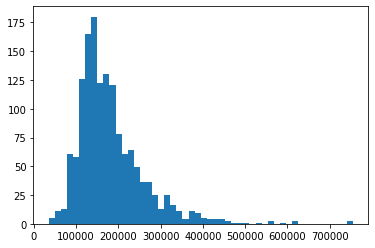

In [14]:
plt.hist(train_houses['SalePrice'],bins=50)

In [15]:
train_houses['LogSale'] = train_houses['SalePrice'].apply(lambda x: np.log(x))

In [16]:
# normalizing sale price for regression later on

(array([  2.,   2.,   1.,   0.,   0.,   0.,   2.,   3.,   4.,   3.,   5.,
          1.,   5.,  21.,  22.,  23.,  18.,  29.,  58.,  56.,  65., 100.,
        122.,  93.,  90.,  82., 108.,  91.,  64.,  55.,  58.,  51.,  46.,
         42.,  23.,  29.,  22.,  13.,  13.,  13.,   7.,   5.,   4.,   1.,
          2.,   2.,   2.,   0.,   0.,   2.]),
 array([10.46024211, 10.52172673, 10.58321134, 10.64469596, 10.70618058,
        10.7676652 , 10.82914982, 10.89063444, 10.95211906, 11.01360367,
        11.07508829, 11.13657291, 11.19805753, 11.25954215, 11.32102677,
        11.38251138, 11.443996  , 11.50548062, 11.56696524, 11.62844986,
        11.68993448, 11.75141909, 11.81290371, 11.87438833, 11.93587295,
        11.99735757, 12.05884219, 12.12032681, 12.18181142, 12.24329604,
        12.30478066, 12.36626528, 12.4277499 , 12.48923452, 12.55071913,
        12.61220375, 12.67368837, 12.73517299, 12.79665761, 12.85814223,
        12.91962684, 12.98111146, 13.04259608, 13.1040807 , 13.16556532,
 

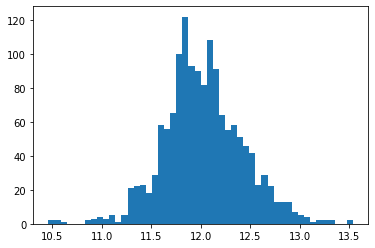

In [17]:
plt.hist(train_houses['LogSale'], bins = 50)

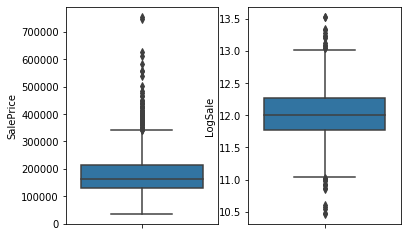

In [18]:
fig, axs = plt.subplots(1,2)
sns.boxplot(y=train_houses['SalePrice'], ax = axs[0])
sns.boxplot(y=train_houses['LogSale'], ax = axs[1])

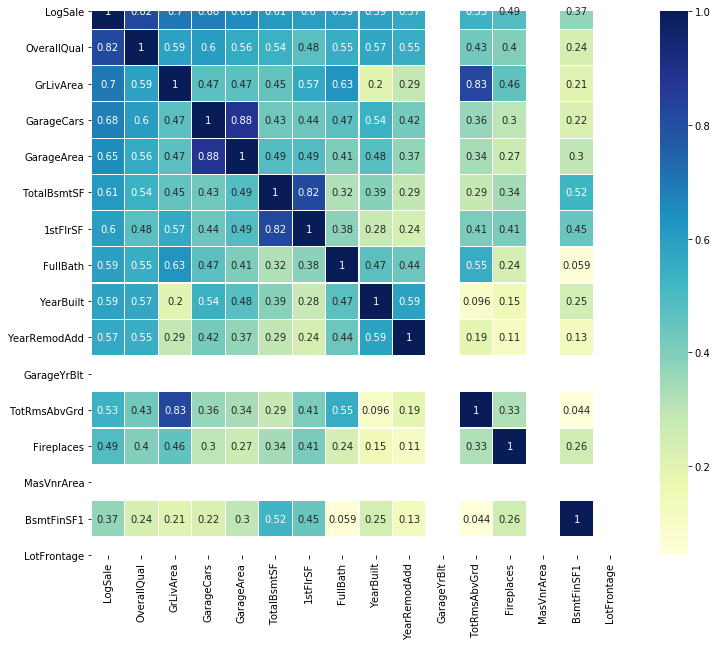

In [19]:
# using heat matrix to get a quick idea of the most important variables
# specific variable correlation matrix
# k is number of top variables
k = 16
cols = train_houses.drop('SalePrice', axis = 1).corr().nlargest(k, 'LogSale')['LogSale'].index 
  
cm = np.corrcoef(train_houses[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values,
           annot = True) 

In [20]:
# Function to which columns are missing data and how much
print("The following columns are missing data.")
print()
missing_data = []
for x in list(train_houses.columns):
    amt_missing = train_houses[x].isnull().sum()
    if amt_missing > 0:
        missing_data.append(x)
    pct_missing = round((amt_missing/train_houses.shape[0])*100,1)
    if pct_missing>0:
        print(f'{x} is missing {pct_missing}% of its data.')
    

The following columns are missing data.

LotFrontage is missing 17.7% of its data.
Alley is missing 93.8% of its data.
MasVnrType is missing 0.5% of its data.
MasVnrArea is missing 0.5% of its data.
BsmtQual is missing 2.5% of its data.
BsmtCond is missing 2.5% of its data.
BsmtExposure is missing 2.6% of its data.
BsmtFinType1 is missing 2.5% of its data.
BsmtFinType2 is missing 2.6% of its data.
Electrical is missing 0.1% of its data.
FireplaceQu is missing 47.3% of its data.
GarageType is missing 5.5% of its data.
GarageYrBlt is missing 5.5% of its data.
GarageFinish is missing 5.5% of its data.
GarageQual is missing 5.5% of its data.
GarageCond is missing 5.5% of its data.
PoolQC is missing 99.5% of its data.
Fence is missing 80.8% of its data.
MiscFeature is missing 96.3% of its data.


In [21]:
# Let's take a look at these variables and see if there are any patterns
# We'll create a list to decide which columns to delete and a list for which rows to drop
drop_columns = []
drop_rows = []

In [22]:
# There are several variables that appear to be related due to their names and amounts of info missing, so we'll look at those
# first to see if there are patterns

In [23]:
# creating a function to give basic information on the variable and distribution
# User will type in the column, the desired impact variable, and the dataframe they wish to get the descriptors from

def basic_exploration(col, y, df):
    
    #for numeric variables
    
    if df[col].dtype == ('float64' or 'int64'):
        print("Distribution for Null Values")
        print(df[df[col].isna()==True][y].describe())
        print()
        print("Distribution for Non-Null Values")
        print(df[df[col].isna()==False][y].describe())
        print(sns.kdeplot(df[df[col].isna()==True][y], label = 'Null Values'))
        print(sns.kdeplot(df[df[col].isna()==False][y], label = 'With Information'))
    
    #for categorical variables
    
    elif df[col].dtype == 'object':
        print(df[col].unique())
        print("Distribution for Null Values")
        print(df[df[col].isna()==True][y].describe())
        print()
        print("Distribution for Non-Null Values")
        print(round(df.groupby(col)[y].describe()),1)
        print()
        
        #loop for creating kde plots for categorical variables      
        print("Distribution plot for sale prices by categorical variable")
        try:
            print(sns.kdeplot(df[df[col].isna()==True][y], label = 'Null Values'))
            for x in list(df[col].unique()):
                print(sns.kdeplot(df[df[col]==x][y], label = x, alpha =.3))
        except:
            print(f'{x} does not contain enough data for a distribution plot.')
            pass
        

In [24]:
# The null value for the alley variable appears to mean that there is no alley, so we will impute this
# first I'll create a function that deals with the different cases for imputing a null value

def impute_null(col, df_mod, df_orig):
    
    #categorical version
    if df_orig[col].dtype == 'object':
        def inner_none(col):
            if pd.isnull(col):
                return 'None'
            else:
                return col
        df_mod[col] = df_orig[col].apply(inner_none)
        
        
    # numerical version    
    elif df_orig[col].dtype == ('float64' or 'int64'):
        def inner_zero(col):
            if pd.isnull(col):
                return 0
            else:
                return col
        df_mod[col] = df_orig[col].apply(inner_zero)    

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Distribution for Null Values
count         8.000000
mean     236484.250000
std       93964.474968
min      182000.000000
25%      196150.000000
50%      203287.000000
75%      221625.000000
max      465000.000000
Name: SalePrice, dtype: float64

Distribution for Non-Null Values
            count      mean      std       min       25%       50%       75%       max
MasVnrType                                                                            
BrkCmn       15.0  146318.0  46188.0   89471.0  114250.0  139000.0  163950.0  277000.0
BrkFace     445.0  204692.0  81214.0   75000.0  149300.0  181000.0  236000.0  755000.0
None        864.0  156222.0  60708.0   34900.0  118991.0  143000.0  181875.0  745000.0
Stone       128.0  265584.0  99940.0  119000.0  194650.0  246839.0  312779.0  611657.0 1

Distribution plot for sale prices by categorical variable
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;

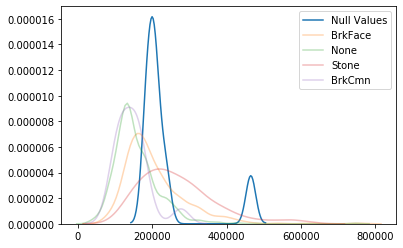

In [25]:
basic_exploration('MasVnrType', 'SalePrice', train_houses)

Distribution for Null Values
count         8.000000
mean     236484.250000
std       93964.474968
min      182000.000000
25%      196150.000000
50%      203287.000000
75%      221625.000000
max      465000.000000
Name: SalePrice, dtype: float64

Distribution for Non-Null Values
count      1452.000000
mean     180615.063361
std       79285.541485
min       34900.000000
25%      129900.000000
50%      162700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


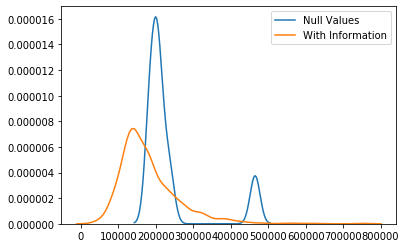

In [26]:
basic_exploration('MasVnrArea', 'SalePrice', train_houses)

In [27]:
train_houses.groupby('MasVnrType')['LogSale'].describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,15.0,11.853239,0.286225,11.401670,11.645452,11.842229,12.007300,12.531773
BrkFace,445.0,12.163630,0.353650,11.225243,11.913713,12.106252,12.371587,13.534473
None,864.0,11.892919,0.363392,10.460242,11.686803,11.870600,12.111069,13.521139
Stone,128.0,12.425138,0.357493,11.686879,12.178958,12.416473,12.653240,13.323927


In [28]:
train_houses[train_houses['MasVnrArea'].isna()==True][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [29]:
# Appear to be some differences, however, there is so little information that it is better to drop these rows
drop_rows.append(['MasVnrArea','MasVnrType'])

In [30]:
bsmt_var = []
for x in list(train_houses.columns):
    if "bsmt" in x.lower():
        bsmt_var.append(x)
bsmt_missing = []
for x in missing_data:
    if "bsmt" in x.lower():
        bsmt_missing.append(x)
print(bsmt_var)
print(bsmt_missing)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']


In [31]:
bsmt_var.append('SalePrice')
train_houses[train_houses[bsmt_missing[0]].isna()==True][bsmt_var].head(10)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,SalePrice
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,90000
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,82000
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,109900
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,118964
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,109500
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,120000
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,97000
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,87500
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,198500
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,134432


In [32]:
for x in bsmt_missing:
    print(x, ":", train_houses[x].dtype)

BsmtQual : object
BsmtCond : object
BsmtExposure : object
BsmtFinType1 : object
BsmtFinType2 : object


In [33]:
#Confirming the organization of the variable
for x in bsmt_missing:
    print(train_houses.groupby(x)['SalePrice'].count())
    print("Null:", train_houses[train_houses[x].isna()==True]['SalePrice'].count())
    print()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: SalePrice, dtype: int64
Null: 37

BsmtCond
Fa      45
Gd      65
Po       2
TA    1311
Name: SalePrice, dtype: int64
Null: 37

BsmtExposure
Av    221
Gd    134
Mn    114
No    953
Name: SalePrice, dtype: int64
Null: 38

BsmtFinType1
ALQ    220
BLQ    148
GLQ    418
LwQ     74
Rec    133
Unf    430
Name: SalePrice, dtype: int64
Null: 37

BsmtFinType2
ALQ      19
BLQ      33
GLQ      14
LwQ      46
Rec      54
Unf    1256
Name: SalePrice, dtype: int64
Null: 38



In [34]:
train_houses[train_houses['BsmtExposure'].isna()==True][train_houses['TotalBsmtSF']!=0][bsmt_var]

C:\Users\myate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,SalePrice
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,0,0,192500


In [35]:
train_houses[train_houses['BsmtExposure'].isna()==True][train_houses['TotalBsmtSF']!=0][bsmt_var]

C:\Users\myate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,SalePrice
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,0,0,192500


In [36]:
train_houses[train_houses['BsmtFinType2'].isna()==True][train_houses['TotalBsmtSF']!=0][bsmt_var]

C:\Users\myate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,SalePrice
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0,284000


In [37]:
# Will drop this above observation due to the null value
modified.drop(948,axis=0, inplace=True)

In [38]:
modified.drop(train_houses[train_houses['BsmtFinType2'].isna()==True][train_houses['TotalBsmtSF']!=0][bsmt_var].index[0],axis=0, inplace=True)

C:\Users\myate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [39]:
# All null values for the basement category correspond to 0 basement square feet, indicating that null means there is no
# basement. Therefore, we will impute the word none for these categories

In [40]:
for x in bsmt_missing:
    impute_null(x, modified, train_houses)

In [41]:
modified.groupby('BsmtCond')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
BsmtCond,,,,,,,,
Fa,45.0,121809.533333,43467.796975,55000.0,91500.0,118500.0,137900.0,265979.0
Gd,65.0,213599.907692,72663.155026,119000.0,155000.0,193879.0,264561.0,465000.0
None,37.0,105652.891892,29278.694797,39300.0,90000.0,101800.0,118858.0,198500.0
Po,2.0,64000.000000,4242.640687,61000.0,62500.0,64000.0,65500.0,67000.0
TA,1309.0,183549.171887,79527.329336,34900.0,132500.0,165000.0,215000.0,755000.0


In [42]:
print("The following columns are missing data.")
print()
missing_data = []
for x in list(modified.columns):
    amt_missing = modified[x].isnull().sum()
    if amt_missing > 0:
        missing_data.append(x)
    pct_missing = round((amt_missing/train_houses.shape[0])*100,1)
    if pct_missing>0:
        print(f'{x} is missing {pct_missing}% of its data.')

The following columns are missing data.

LotFrontage is missing 17.8% of its data.
Alley is missing 93.8% of its data.
MasVnrType is missing 0.5% of its data.
MasVnrArea is missing 0.5% of its data.
Electrical is missing 0.1% of its data.
FireplaceQu is missing 47.3% of its data.
GarageType is missing 5.6% of its data.
GarageYrBlt is missing 5.6% of its data.
GarageFinish is missing 5.6% of its data.
GarageQual is missing 5.6% of its data.
GarageCond is missing 5.6% of its data.
PoolQC is missing 99.5% of its data.
Fence is missing 80.7% of its data.
MiscFeature is missing 96.3% of its data.


In [43]:
garage_var = []
for x in list(train_houses.columns):
    if "garage" in x.lower():
        garage_var.append(x)
garage_missing = []
for x in missing_data:
    if "garage" in x.lower():
        garage_missing.append(x)
print(garage_var)
print(garage_missing)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [44]:
train_houses[train_houses['GarageType'].isna()==True][train_houses['GarageYrBlt'].isna()==False]

C:\Users\myate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSale


In [45]:
train_houses[train_houses['GarageType'].isna()==True][garage_var]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


In [46]:
for x in garage_missing:
    impute_null(x, modified, train_houses)

In [47]:
# self-check
modified.groupby('GarageCond')['SalePrice'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
GarageCond,,,,,,,,
None,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.0,200500.0
Po,7.0,108500.000000,22662.377045,67000.0,101250.0,108000.0,122500.0,137000.0
Fa,35.0,114654.028571,36420.903588,40000.0,89000.0,114504.0,137500.0,220000.0
Ex,2.0,124000.000000,4949.747468,120500.0,122250.0,124000.0,125750.0,127500.0
Gd,9.0,179930.000000,64769.318354,118500.0,144000.0,148000.0,180000.0,302000.0
TA,1324.0,187809.656344,79118.837841,35311.0,135000.0,170000.0,221000.0,755000.0


Distribution for Null Values
count       259.000000
mean     181620.073359
std       57841.775706
min       61000.000000
25%      143375.000000
50%      172400.000000
75%      215000.000000
max      466500.000000
Name: SalePrice, dtype: float64

Distribution for Non-Null Values
count      1199.000000
mean     180674.601334
std       83405.047281
min       34900.000000
25%      127500.000000
50%      159434.000000
75%      213495.000000
max      755000.000000
Name: SalePrice, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


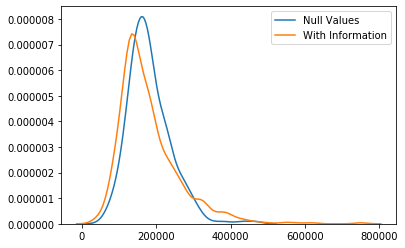

In [48]:
basic_exploration('LotFrontage', 'SalePrice', train_houses)

In [49]:
# Doesn't seem like theres a large difference between these sets, so we'll add to the drop columns category due to the large
# amount of data missing
drop_columns.append('LotFrontage')

[nan 'Grvl' 'Pave']
Distribution for Null Values
count      1367.000000
mean     183371.959034
std       80679.912200
min       34900.000000
25%      130500.000000
50%      165000.000000
75%      217250.000000
max      755000.000000
Name: SalePrice, dtype: float64

Distribution for Non-Null Values
       count      mean      std      min       25%       50%       75%       max
Alley                                                                           
Grvl    50.0  122219.0  34781.0  52500.0  105312.0  119500.0  136750.0  256000.0
Pave    41.0  168001.0  38370.0  40000.0  151000.0  172500.0  185000.0  265979.0 1

Distribution plot for sale prices by categorical variable
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


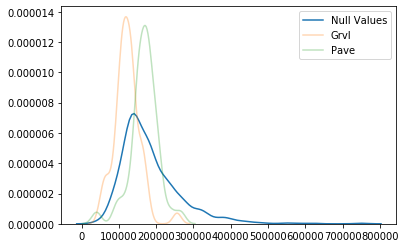

In [50]:
basic_exploration('Alley','SalePrice',train_houses)

In [51]:
impute_null('Alley', modified, train_houses)

In [52]:
modified.groupby('Alley')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Alley,,,,,,,,
Grvl,50.0,122219.080000,34780.780734,52500.0,105312.5,119500.0,136750.0,256000.0
None,1367.0,183371.959034,80679.912200,34900.0,130500.0,165000.0,217250.0,755000.0
Pave,41.0,168000.585366,38370.375243,40000.0,151000.0,172500.0,185000.0,265979.0


In [53]:
print("The following columns are missing data.")
print()
missing_data = []
for x in list(modified.columns):
    amt_missing = modified[x].isnull().sum()
    if amt_missing > 0:
        missing_data.append(x)
    pct_missing = round((amt_missing/train_houses.shape[0])*100,1)
    if pct_missing>0:
        print(f'{x} is missing {pct_missing}% of its data.')

The following columns are missing data.

LotFrontage is missing 17.8% of its data.
MasVnrType is missing 0.5% of its data.
MasVnrArea is missing 0.5% of its data.
Electrical is missing 0.1% of its data.
FireplaceQu is missing 47.3% of its data.
PoolQC is missing 99.5% of its data.
Fence is missing 80.7% of its data.
MiscFeature is missing 96.3% of its data.


In [54]:
print(train_houses[train_houses['Electrical'].isna()==True]['SalePrice'].describe())
print(train_houses.groupby('Electrical')['SalePrice'].describe())

count         1.0
mean     167500.0
std           NaN
min      167500.0
25%      167500.0
50%      167500.0
75%      167500.0
max      167500.0
Name: SalePrice, dtype: float64
             count           mean           std      min       25%       50%        75%       max
Electrical                                                                                       
FuseA         94.0  122196.893617  37511.376615  34900.0   98500.0  121250.0  143531.25  239000.0
FuseF         27.0  107675.444444  30636.507376  39300.0   88500.0  115000.0  129950.00  169500.0
FuseP          3.0   97333.333333  34645.827070  73000.0   77500.0   82000.0  109500.00  137000.0
Mix            1.0   67000.000000           NaN  67000.0   67000.0   67000.0   67000.00   67000.0
SBrkr       1332.0  186747.898649  79871.844160  37900.0  134500.0  170000.0  220250.00  755000.0


In [55]:
#only one count of electrical missing, will drop this value
modified.drop(train_houses[train_houses['Electrical'].isna()==True].index[0], axis=0, inplace=True)

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Distribution for Null Values
count       689.000000
mean     141293.502177
std       44410.814331
min       34900.000000
25%      112000.000000
50%      135000.000000
75%      164000.000000
max      342643.000000
Name: SalePrice, dtype: float64

Distribution for Non-Null Values
             count      mean       std       min       25%       50%       75%       max
FireplaceQu                                                                             
Ex            24.0  337712.0  123611.0  130500.0  265070.0  314250.0  411324.0  755000.0
Fa            33.0  167298.0   34288.0  117000.0  143000.0  158000.0  187000.0  262000.0
Gd           379.0  226199.0   91195.0   90350.0  159448.0  206900.0  274935.0  611657.0
Po            20.0  129764.0   31081.0   60000.0  120925.0  131500.0  149500.0  172000.0
TA           312.0  205766.0   71478.0   82500.0  165000.0  187250.0  236125.0  745000.0 1

Distribution plot for sale prices by categorical variable
AxesSu

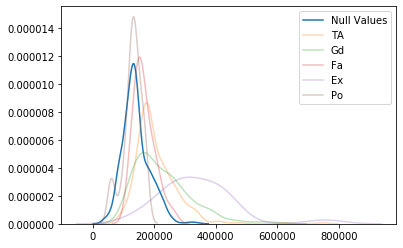

In [56]:
basic_exploration('FireplaceQu', 'SalePrice', train_houses)

In [57]:
train_houses[train_houses['FireplaceQu'].isna()==True]['Fireplaces']

0       0
5       0
10      0
12      0
15      0
       ..
1452    0
1453    0
1454    0
1458    0
1459    0
Name: Fireplaces, Length: 689, dtype: int64

In [58]:
train_houses[train_houses['FireplaceQu'].isna()==True][train_houses['Fireplaces']!=0]

C:\Users\myate\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSale


In [59]:
# same case as before, null corresponds to none
impute_null('FireplaceQu', modified, train_houses)

In [60]:
print(train_houses[train_houses['PoolArea']!=0]['SalePrice'].describe())
print(train_houses[train_houses['PoolArea']==0]['SalePrice'].describe())

count         7.000000
mean     288138.571429
std      206071.850935
min      160000.000000
25%      176000.000000
50%      235000.000000
75%      262485.000000
max      745000.000000
Name: SalePrice, dtype: float64
count      1450.000000
mean     180333.776552
std       78200.998092
min       34900.000000
25%      129900.000000
50%      162700.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


[nan 'Ex' 'Fa' 'Gd']
Distribution for Null Values
count      1450.000000
mean     180333.776552
std       78200.998092
min       34900.000000
25%      129900.000000
50%      162700.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Distribution for Non-Null Values
        count      mean       std       min       25%       50%       75%       max
PoolQC                                                                             
Ex        2.0  490000.0  360624.0  235000.0  362500.0  490000.0  617500.0  745000.0
Fa        2.0  215500.0   48790.0  181000.0  198250.0  215500.0  232750.0  250000.0
Gd        3.0  201990.0   63441.0  160000.0  165500.0  171000.0  222985.0  274970.0 1

Distribution plot for sale prices by categorical variable
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


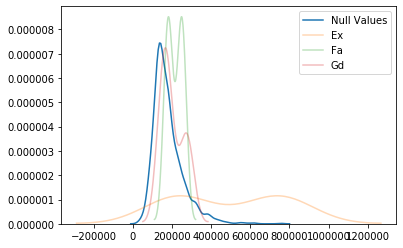

In [61]:
basic_exploration('PoolQC', 'SalePrice', train_houses)

In [62]:
# will later be dummied
impute_null('PoolQC', modified, train_houses)

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Distribution for Null Values
count      1176.000000
mean     187527.782313
std       81710.031566
min       35311.000000
25%      132500.000000
50%      173000.000000
75%      224600.000000
max      755000.000000
Name: SalePrice, dtype: float64

Distribution for Non-Null Values
       count      mean      std       min       25%       50%       75%       max
Fence                                                                            
GdPrv   59.0  178927.0  56757.0  108000.0  144950.0  167500.0  189475.0  475000.0
GdWo    54.0  140379.0  53593.0   34900.0  118625.0  138750.0  151750.0  381000.0
MnPrv  157.0  148751.0  66096.0   40000.0  119900.0  137450.0  158000.0  745000.0
MnWw    11.0  134286.0  21782.0  110000.0  121500.0  130000.0  143000.0  187000.0 1

Distribution plot for sale prices by categorical variable
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.1

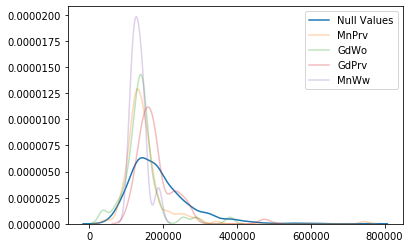

In [63]:
basic_exploration('Fence', 'SalePrice', train_houses)

In [64]:
# fence follows null = none pattern
impute_null('Fence', modified, train_houses)

In [65]:
print("The following columns are missing data.")
print()
missing_data = []
for x in list(modified.columns):
    amt_missing = modified[x].isnull().sum()
    if amt_missing > 0:
        missing_data.append(x)
    pct_missing = round((amt_missing/train_houses.shape[0])*100,1)
    if pct_missing>0:
        print(f'{x} is missing {pct_missing}% of its data.')

The following columns are missing data.

LotFrontage is missing 17.8% of its data.
MasVnrType is missing 0.5% of its data.
MasVnrArea is missing 0.5% of its data.
MiscFeature is missing 96.3% of its data.


[nan 'Shed' 'Gar2' 'Othr' 'TenC']
Distribution for Null Values
count      1403.000000
mean     181976.659301
std       80122.060996
min       34900.000000
25%      130000.000000
50%      164000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Distribution for Non-Null Values
             count      mean      std       min       25%       50%       75%       max
MiscFeature                                                                            
Gar2           2.0  170750.0  27224.0  151500.0  161125.0  170750.0  180375.0  190000.0
Othr           2.0   94000.0  55154.0   55000.0   74500.0   94000.0  113500.0  133000.0
Shed          49.0  151188.0  51643.0   55993.0  120000.0  144000.0  172000.0  277000.0
TenC           1.0  250000.0      NaN  250000.0  250000.0  250000.0  250000.0  250000.0 1

Distribution plot for sale prices by categorical variable
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;

C:\Users\myate\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\myate\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


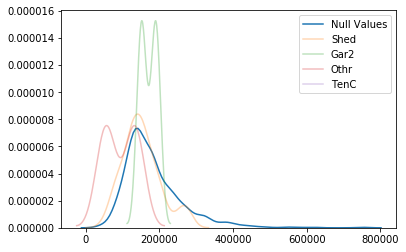

In [66]:
basic_exploration('MiscFeature', 'SalePrice', train_houses)

In [67]:
# Not enough information in this column, going to drop
drop_columns.append('MiscFeature')
drop_columns

['LotFrontage', 'MiscFeature']

In [68]:
modified.drop(drop_columns, axis=1, inplace=True)

In [69]:
modified.dropna(axis=0, inplace=True)

In [70]:
print("The following columns are missing data.")
print()
missing_data = []
for x in list(modified.columns):
    amt_missing = modified[x].isnull().sum()
    if amt_missing > 0:
        missing_data.append(x)
    pct_missing = round((amt_missing/train_houses.shape[0])*100,1)
    if pct_missing>0:
        print(f'{x} is missing {pct_missing}% of its data.')

The following columns are missing data.



In [71]:
# Now we can go on to part 3. Mapping and dummying our variables

In [72]:
# First lets separate columns by whether or not they are categorical
categorical = list(modified.select_dtypes(include='object').columns)
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'SaleType',
 'SaleCondition']

In [73]:
numerical = list(modified.select_dtypes(include = 'number').columns)
numerical

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LogSale']

In [74]:
# Let's start by looking at the distributions of the categorical variables. To do this, we will create a function (similar to
# basic_exploration) that will display overall stats of the variables and their categoroes
popped_list = []

def data_explore_pop(categories, y, df):
    
    try:
        if len(categories)>0:

            #going to use pop function to go through the list without having to always to specifically refer to columns 
            col = categories.pop()
            popped_list.append(col)

            print()
            print(f'Distribution of Categories of {col}')
            print(round(df.groupby(col)[y].describe().sort_values('mean')),1)
            print()

            #loop for creating kde plots for categorical variables      
            print(f'Distribution plot for sale prices by categorical variable for {col}')
            for x in list(df[col].unique()):
                try: 
                    print(sns.kdeplot(df[df[col]==x][y], label = x, alpha =.8))
                except:
                    print(f'{x} does not contain enough data for a distribution plot.')
                    pass


        else:
            print('List is empty.')
    except:
        print('There was an error. Please ensure everything was entered correctly.')
        pass

In [75]:
#Non-popped version to just explore
def data_explore(col, y, df):
    
    if len(col)>0:

        print()
        print(f'Distribution of Categories of {col}')
        print(round(df.groupby(col)[y].describe().sort_values('mean')),1)
        print()

        #loop for creating kde plots for categorical variables      
        print(f'Distribution plot for sale prices by categorical variable for {col}')
        for x in list(df[col].unique()):
            try: 
                print(sns.kdeplot(df[df[col]==x][y], label = x, alpha =.8))
            except:
                print(f'{x} does not contain enough data for a distribution plot.')
                pass
    
    
    else:
        print('List is empty.')

In [76]:
# Creating lists to put categorical variables into by which type of operation will be performed
two_dummy_list = []
mapping_list = []
one_hot_encode_list = []
drop_variable = []

In [77]:
#Function designed to create a two category dummy for variables with more than 2 categories

def twotype_dummy(desired_dummy,col,df):
    if col not in list(df.columns):
        print(col, " is not a column in entered dataframe.")
        print("Please correct the inputs and try again.")
        
    elif  desired_dummy not in list(df[col].unique()):
        print(desired_dummy, " is not a type for the column: ", col)
        print("Please correct the inputs and try again.")
    
    else:
        new_df_name = col + desired_dummy[0:3]
        def type_singledummy(x):
            if x == desired_dummy:
                return 1
            else:
                return 0
        df[new_df_name] = df[col].apply(type_singledummy)
        df.drop(col, axis=1,inplace=True)

In [78]:
# creating copy of df and categorical list in case of errors
dummying = modified
categorical1 = categorical
dummying.head(5)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSale
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,12.429216


In [79]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [80]:
# extracts columns to use for anova test: testing if means of different categories are significantly different
# need to import f_oneway and ttest_ind from scipy.stats before using

def means_test(col, y, df):
    length = len(df[col].unique())
    if length == 2:
        type0 = df[col].unique()[0]
        type1 = df[col].unique()[1]
        print(ttest_ind(df[df[col]==type0][y],df[df[col]==type1][y]))
    elif length == 3:
        type0 = df[col].unique()[0]
        type1 = df[col].unique()[1]
        type2 = df[col].unique()[2]
        print(f_oneway(df[df[col]==type0][y],df[df[col]==type1][y],df[df[col]==type2][y]))
    elif length == 4:
        type0 = df[col].unique()[0]
        type1 = df[col].unique()[1]
        type2 = df[col].unique()[2]
        type3 = df[col].unique()[3]
        print(f_oneway(df[df[col]==type0][y],df[df[col]==type1][y],df[df[col]==type2][y],df[df[col]==type3][y]))
    elif length == 5:
        type0 = df[col].unique()[0]
        type1 = df[col].unique()[1]
        type2 = df[col].unique()[2]
        type3 = df[col].unique()[3]
        type4 = df[col].unique()[4]
        print(f_oneway(df[df[col]==type0][y],df[df[col]==type1][y],df[df[col]==type2][y],df[df[col]==type3][y],
                 df[df[col]==type4][y]))
    elif length == 6:
        type0 = df[col].unique()[0]
        type1 = df[col].unique()[1]
        type2 = df[col].unique()[2]
        type3 = df[col].unique()[3]
        type4 = df[col].unique()[4]
        type5 = df[col].unique()[5]
        print(f_oneway(df[df[col]==type0][y],df[df[col]==type1][y],df[df[col]==type2][y],df[df[col]==type3][y],
                 df[df[col]==type4][y],df[df[col]==type5][y]))
    elif length == 7:
        type0 = df[col].unique()[0]
        type1 = df[col].unique()[1]
        type2 = df[col].unique()[2]
        type3 = df[col].unique()[3]
        type4 = df[col].unique()[4]
        type5 = df[col].unique()[5]
        type6 = df[col].unique()[6]
        print(f_oneway(df[df[col]==type0][y],df[df[col]==type1][y],df[df[col]==type2][y],df[df[col]==type3][y],
                 df[df[col]==type4][y],df[df[col]==type5][y],df[df[col]==type6][y]))
    elif length == 8:
        type0 = df[col].unique()[0]
        type1 = df[col].unique()[1]
        type2 = df[col].unique()[2]
        type3 = df[col].unique()[3]
        type4 = df[col].unique()[4]
        type5 = df[col].unique()[5]
        type6 = df[col].unique()[6]
        type7 = df[col].unique()[7]
        print(f_oneway(df[df[col]==type0][y],df[df[col]==type1][y],df[df[col]==type2][y],df[df[col]==type3][y],
                 df[df[col]==type4][y],df[df[col]==type5][y],df[df[col]==type6][y],df[df[col]==type7][y]))
    else:
        print(f'Too many variations of {col} to perform function.')


Distribution of Categories of SaleCondition
                count      mean       std       min       25%       50%       75%       max
SaleCondition                                                                              
AdjLand           4.0  104125.0   26135.0   81000.0   81750.0  104000.0  126375.0  127500.0
Abnorml         101.0  146527.0   82796.0   34900.0  104000.0  130000.0  172500.0  745000.0
Family           20.0  149600.0   47820.0   82500.0  115500.0  140500.0  170250.0  259000.0
Alloca           11.0  164355.0   87900.0   55993.0  113908.0  142953.0  192650.0  359100.0
Normal         1191.0  174982.0   69805.0   39300.0  129950.0  159950.0  205000.0  755000.0
Partial         122.0  272046.0  102965.0  113000.0  193909.0  245589.0  336218.0  611657.0 1

Distribution plot for sale prices by categorical variable for SaleCondition
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775

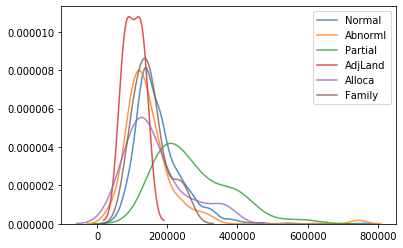

In [81]:
data_explore_pop(categorical1, 'SalePrice',dummying)

In [82]:
means_test('SaleCondition', 'SalePrice', dummying)

F_onewayResult(statistic=44.64727505399639, pvalue=6.150300985912897e-43)



Distribution of Categories of SaleType
           count      mean       std       min       25%       50%       75%       max
SaleType                                                                              
Oth          3.0  119850.0   28441.0   93500.0  104775.0  116050.0  133025.0  150000.0
ConLD        9.0  138781.0   53877.0   79900.0   85000.0  140000.0  160000.0  235128.0
ConLw        5.0  143700.0   67292.0   60000.0   95000.0  144000.0  207500.0  212000.0
COD         43.0  143973.0   47098.0   60000.0  112000.0  139000.0  160500.0  287000.0
WD        1259.0  173162.0   71241.0   34900.0  128500.0  157500.0  202500.0  755000.0
ConLI        5.0  200390.0  145283.0  110000.0  115000.0  125000.0  200000.0  451950.0
CWD          4.0  210600.0   86421.0  136000.0  152500.0  188750.0  246850.0  328900.0
Con          2.0  269600.0   76933.0  215200.0  242400.0  269600.0  296800.0  324000.0
New        119.0  274760.0  102481.0  113000.0  194100.0  248328.0  341196.0  611657.0 1



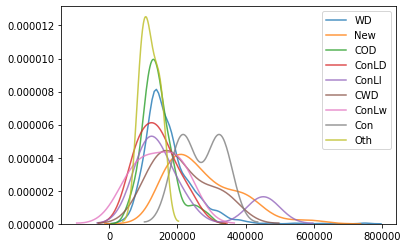

In [83]:
data_explore_pop(categorical1, 'SalePrice',dummying)

In [84]:
twotype_dummy('New', 'SaleType', dummying)

In [85]:
means_test('SaleTypeNew', 'SalePrice', dummying)

Ttest_indResult(statistic=-14.464283327026871, pvalue=2.1716509068462604e-44)



Distribution of Categories of SaleTypeNew
              count      mean       std       min       25%       50%       75%       max
SaleTypeNew                                                                              
0            1330.0  172115.0   71109.0   34900.0  127500.0  156000.0  200500.0  755000.0
1             119.0  274760.0  102481.0  113000.0  194100.0  248328.0  341196.0  611657.0 1

Distribution plot for sale prices by categorical variable for SaleTypeNew
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


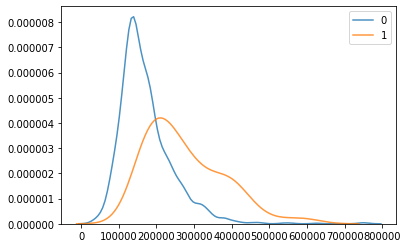

In [86]:
data_explore('SaleTypeNew', 'SalePrice', dummying)


Distribution of Categories of Fence
        count      mean      std       min       25%       50%       75%       max
Fence                                                                             
MnWw     11.0  134286.0  21782.0  110000.0  121500.0  130000.0  143000.0  187000.0
GdWo     54.0  140379.0  53593.0   34900.0  118625.0  138750.0  151750.0  381000.0
MnPrv   157.0  148751.0  66096.0   40000.0  119900.0  137450.0  158000.0  745000.0
GdPrv    59.0  178927.0  56757.0  108000.0  144950.0  167500.0  189475.0  475000.0
None   1168.0  187192.0  81565.0   35311.0  132500.0  172500.0  224600.0  755000.0 1

Distribution plot for sale prices by categorical variable for Fence
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


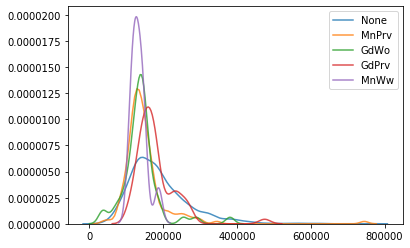

In [87]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of PoolQC
         count      mean       std       min       25%       50%       75%       max
PoolQC                                                                              
None    1442.0  180022.0   78031.0   34900.0  129600.0  162000.0  213498.0  755000.0
Gd         3.0  201990.0   63441.0  160000.0  165500.0  171000.0  222985.0  274970.0
Fa         2.0  215500.0   48790.0  181000.0  198250.0  215500.0  232750.0  250000.0
Ex         2.0  490000.0  360624.0  235000.0  362500.0  490000.0  617500.0  745000.0 1

Distribution plot for sale prices by categorical variable for PoolQC
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


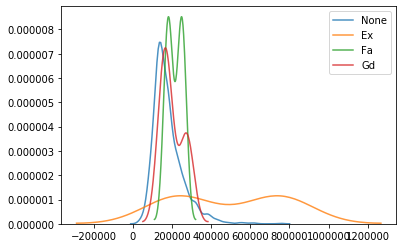

In [88]:
data_explore_pop(categorical1, 'SalePrice',dummying)

In [89]:
twotype_dummy('None', 'PoolQC',dummying)


Distribution of Categories of PoolQCNon
            count      mean       std       min       25%       50%       75%       max
PoolQCNon                                                                              
1          1442.0  180022.0   78031.0   34900.0  129600.0  162000.0  213498.0  755000.0
0             7.0  288139.0  206072.0  160000.0  176000.0  235000.0  262485.0  745000.0 1

Distribution plot for sale prices by categorical variable for PoolQCNon
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


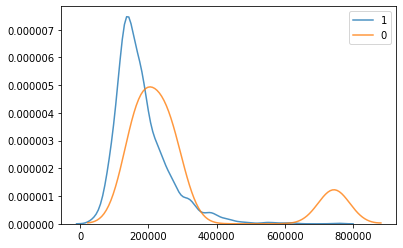

In [90]:
data_explore('PoolQCNon', 'SalePrice', dummying)

In [91]:
means_test('PoolQCNon', 'SalePrice', dummying)

Ttest_indResult(statistic=-3.6124936400629646, pvalue=0.00031363951528384933)



Distribution of Categories of PavedDrive
             count      mean      std      min       25%       50%       75%       max
PavedDrive                                                                            
N             90.0  115039.0  44353.0  34900.0   84625.0  111000.0  137100.0  265979.0
P             30.0  132330.0  33503.0  79500.0  102750.0  132250.0  159100.0  215000.0
Y           1329.0  186069.0  79561.0  35311.0  134000.0  168000.0  220000.0  755000.0 1

Distribution plot for sale prices by categorical variable for PavedDrive
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


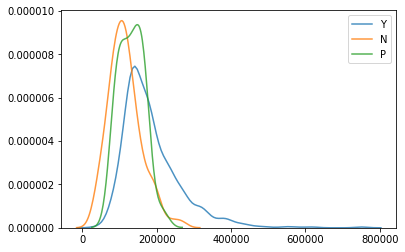

In [92]:
data_explore_pop(categorical1,'SalePrice',dummying)

In [93]:
means_test('PavedDrive', 'SalePrice', dummying)

F_onewayResult(statistic=41.672677558288115, pvalue=2.5360035499353645e-18)



Distribution of Categories of GarageCond
             count      mean      std       min       25%       50%       75%       max
GarageCond                                                                             
None          81.0  103317.0  32815.0   34900.0   82500.0  100000.0  124000.0  200500.0
Po             7.0  108500.0  22662.0   67000.0  101250.0  108000.0  122500.0  137000.0
Fa            35.0  114654.0  36421.0   40000.0   89000.0  114504.0  137500.0  220000.0
Ex             2.0  124000.0   4950.0  120500.0  122250.0  124000.0  125750.0  127500.0
Gd             9.0  179930.0  64769.0  118500.0  144000.0  148000.0  180000.0  302000.0
TA          1315.0  187529.0  78999.0   35311.0  135000.0  169990.0  221000.0  755000.0 1

Distribution plot for sale prices by categorical variable for GarageCond
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x

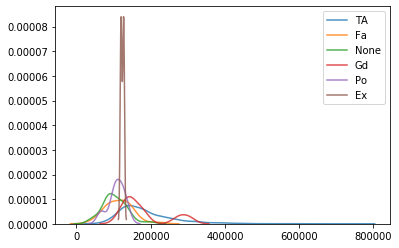

In [94]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [95]:
# need to make a map to add numerical values to condition and quality variables: we expect a linear relationship
# will also create interaction terms for quality and condition
# also create term for "has attribute"
qualmap = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

In [96]:
#ensuring the mapping worked
dummying['GarageCond'] = dummying['GarageCond'].map(qualmap)
dummying['GarageCond'].describe()

count    1449.000000
mean        2.807453
std         0.722220
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: GarageCond, dtype: float64

In [97]:
def has_dummy(x):
    if x == 0 or x == 'None':
        return 0
    else:
        return 1

In [98]:
dummying['HasGarage'] = dummying['GarageCond'].apply(has_dummy)

In [99]:
def create_interaction(col1,col2,df):
    new_col_name = col1 + "*" + col2
    df[new_col_name] = df[col1] * df[col2]


Distribution of Categories of GarageQual
             count      mean       std       min       25%       50%       75%       max
GarageQual                                                                              
Po             3.0  100167.0   35144.0   67000.0   81750.0   96500.0  116750.0  137000.0
None          81.0  103317.0   32815.0   34900.0   82500.0  100000.0  124000.0  200500.0
Fa            48.0  123573.0   42971.0   64500.0   99500.0  115000.0  135612.0  256000.0
TA          1300.0  187126.0   78664.0   35311.0  135000.0  169250.0  220000.0  755000.0
Gd            14.0  215861.0   74127.0   90350.0  165975.0  209115.0  271852.0  325000.0
Ex             3.0  241000.0  202680.0  120500.0  124000.0  127500.0  301250.0  475000.0 1

Distribution plot for sale prices by categorical variable for GarageQual
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.12

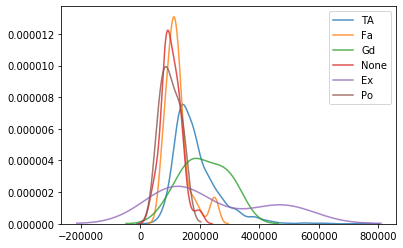

In [100]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [101]:
dummying['GarageQual'] = dummying['GarageQual'].map(qualmap)
dummying['GarageQual'].describe()

count    1449.000000
mean        2.808834
std         0.725448
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: GarageQual, dtype: float64

In [102]:
create_interaction('GarageCond', 'GarageQual', dummying)


Distribution of Categories of GarageFinish
              count      mean      std      min       25%       50%       75%       max
GarageFinish                                                                           
None           81.0  103317.0  32815.0  34900.0   82500.0  100000.0  124000.0  200500.0
Unf           605.0  142156.0  46499.0  35311.0  116000.0  135000.0  157000.0  475000.0
RFn           416.0  201846.0  63836.0  68400.0  157975.0  190000.0  232000.0  582933.0
Fin           347.0  239964.0  96746.0  82500.0  176000.0  215000.0  284232.0  755000.0 1

Distribution plot for sale prices by categorical variable for GarageFinish
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


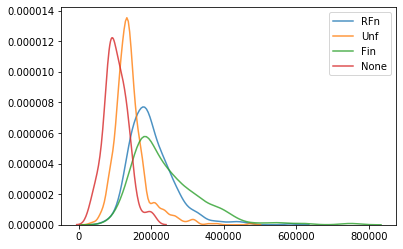

In [103]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [104]:
means_test('GarageFinish', 'SalePrice', dummying)

F_onewayResult(statistic=212.46880314484883, pvalue=3.6868482388459835e-114)



Distribution of Categories of GarageType
            count      mean       std      min       25%       50%       75%       max
GarageType                                                                            
None         81.0  103317.0   32815.0  34900.0   82500.0  100000.0  124000.0  200500.0
CarPort       9.0  109962.0   24638.0  82000.0   95000.0  108000.0  110000.0  164900.0
Detchd      387.0  134091.0   41392.0  35311.0  110000.0  129500.0  147700.0  475000.0
2Types        6.0  151283.0   34917.0  87000.0  146250.0  159000.0  170250.0  186700.0
Basment      19.0  160571.0   63967.0  55993.0  132250.0  148000.0  174000.0  359100.0
Attchd      861.0  202514.0   76966.0  60000.0  149900.0  185000.0  235000.0  755000.0
BuiltIn      86.0  256211.0  102899.0  91000.0  181775.0  231500.0  302558.0  582933.0 1

Distribution plot for sale prices by categorical variable for GarageType
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0

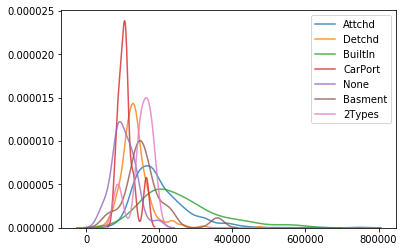

In [105]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [106]:
means_test('GarageType', 'SalePrice', dummying)

F_onewayResult(statistic=80.39992099417306, pvalue=7.170486547379049e-87)



Distribution of Categories of FireplaceQu
             count      mean       std       min       25%       50%       75%       max
FireplaceQu                                                                             
Po            20.0  129764.0   31081.0   60000.0  120925.0  131500.0  149500.0  172000.0
None         685.0  140990.0   44356.0   34900.0  112000.0  135000.0  162500.0  342643.0
Fa            33.0  167298.0   34288.0  117000.0  143000.0  158000.0  187000.0  262000.0
TA           310.0  205748.0   71705.0   82500.0  165000.0  186850.0  236375.0  745000.0
Gd           377.0  225537.0   90600.0   90350.0  159000.0  205000.0  274900.0  611657.0
Ex            24.0  337712.0  123611.0  130500.0  265070.0  314250.0  411324.0  755000.0 1

Distribution plot for sale prices by categorical variable for FireplaceQu
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.

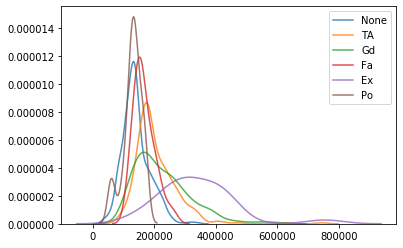

In [107]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [108]:
means_test('FireplaceQu', 'SalePrice', dummying)

F_onewayResult(statistic=120.40942231253038, pvalue=1.2841341523061e-106)


In [109]:
def map_cat(col, df):
    df[col] = df[col].map(qualmap)
    print(df[col].describe())

In [110]:
map_cat('FireplaceQu', dummying)

count    1449.000000
mean        1.824707
std         1.811084
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: FireplaceQu, dtype: float64


In [111]:
create_interaction('Fireplaces', 'FireplaceQu', dummying)


Distribution of Categories of Functional
             count      mean       std       min       25%       50%       75%       max
Functional                                                                              
Maj2           5.0   85800.0   27087.0   52000.0   67000.0   85000.0  110000.0  115000.0
Sev            1.0  129000.0       NaN  129000.0  129000.0  129000.0  129000.0  129000.0
Min2          34.0  144241.0   41215.0   87000.0  124250.0  140000.0  164238.0  316600.0
Min1          31.0  146385.0   38090.0   82000.0  123750.0  139000.0  167450.0  256000.0
Maj1          13.0  150358.0   65665.0   60000.0  130000.0  137500.0  155000.0  315000.0
Mod           15.0  168393.0  118939.0   55000.0  102750.0  137900.0  195000.0  538000.0
Typ         1350.0  183058.0   79876.0   34900.0  130625.0  165000.0  217000.0  755000.0 1

Distribution plot for sale prices by categorical variable for Functional
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSub

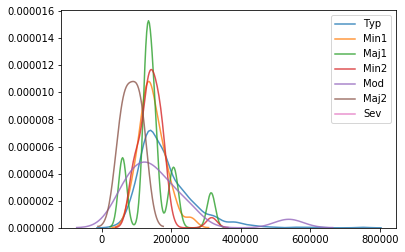

In [112]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [113]:
means_test('Functional', 'SalePrice', dummying)

F_onewayResult(statistic=4.053666321556669, pvalue=0.0004895661036449023)


In [114]:
def func_map(x):
    if x == 'Typ':
        return 'Typ'
    elif x == 'Mod':
        return 'MinMod'
    elif x == 'Min1':
        return 'MinMod'
    elif x == 'Min2':
        return 'MinMod'
    else:
        return 'MajSev'

In [115]:
dummying['Functional'] = dummying['Functional'].apply(func_map)

In [116]:
dummying.groupby('Functional')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Functional,,,,,,,,
MajSev,19.0,132244.736842,62244.716185,52000.0,97500.0,130000.0,147700.0,315000.0
MinMod,80.0,149600.400000,62056.137632,55000.0,120625.0,139750.0,168250.0,538000.0
Typ,1350.0,183058.066667,79875.926903,34900.0,130625.0,165000.0,217000.0,755000.0



Distribution of Categories of KitchenQual
             count      mean       std      min       25%       50%       75%       max
KitchenQual                                                                            
Fa            39.0  105565.0   36004.0  39300.0   81000.0  115000.0  131500.0  200000.0
TA           734.0  139880.0   38858.0  34900.0  116012.0  136952.0  160000.0  375000.0
Gd           577.0  212183.0   64383.0  79000.0  171900.0  201800.0  244000.0  625000.0
Ex            99.0  327176.0  120686.0  86000.0  262816.0  315500.0  384485.0  755000.0 1

Distribution plot for sale prices by categorical variable for KitchenQual
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


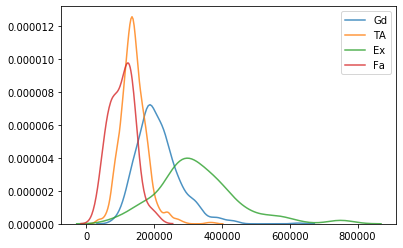

In [117]:
data_explore_pop(categorical1,'SalePrice', dummying)

In [118]:
map_cat('KitchenQual', dummying)

count    1449.000000
mean        3.507937
std         0.663865
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: KitchenQual, dtype: float64



Distribution of Categories of Electrical
             count      mean      std      min       25%       50%       75%       max
Electrical                                                                            
Mix            1.0   67000.0      NaN  67000.0   67000.0   67000.0   67000.0   67000.0
FuseP          3.0   97333.0  34646.0  73000.0   77500.0   82000.0  109500.0  137000.0
FuseF         27.0  107675.0  30637.0  39300.0   88500.0  115000.0  129950.0  169500.0
FuseA         94.0  122197.0  37511.0  34900.0   98500.0  121250.0  143531.0  239000.0
SBrkr       1324.0  186447.0  79727.0  37900.0  134446.0  169250.0  220250.0  755000.0 1

Distribution plot for sale prices by categorical variable for Electrical
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


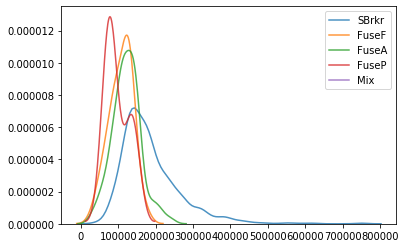

In [119]:
data_explore_pop(categorical1,'SalePrice', dummying)

In [120]:
twotype_dummy('SBrkr', 'Electrical', dummying)

In [121]:
means_test('ElectricalSBr', 'SalePrice', dummying)

Ttest_indResult(statistic=9.499197016992092, pvalue=8.41564325600938e-21)



Distribution of Categories of ElectricalSBr
                count      mean      std      min       25%       50%       75%       max
ElectricalSBr                                                                            
0               125.0  118022.0  36597.0  34900.0   92900.0  118000.0  139400.0  239000.0
1              1324.0  186447.0  79727.0  37900.0  134446.0  169250.0  220250.0  755000.0 1

Distribution plot for sale prices by categorical variable for ElectricalSBr
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


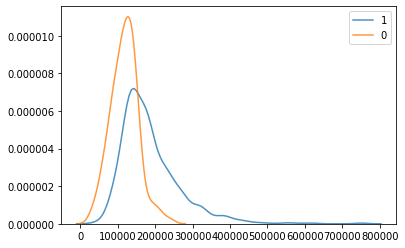

In [122]:
data_explore('ElectricalSBr', 'SalePrice', dummying)


Distribution of Categories of CentralAir
             count      mean      std      min       25%       50%       75%       max
CentralAir                                                                            
N             95.0  105264.0  40671.0  34900.0   82000.0   98000.0  128500.0  265979.0
Y           1354.0  185826.0  78693.0  52000.0  134462.0  167900.0  218908.0  755000.0 1

Distribution plot for sale prices by categorical variable for CentralAir
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


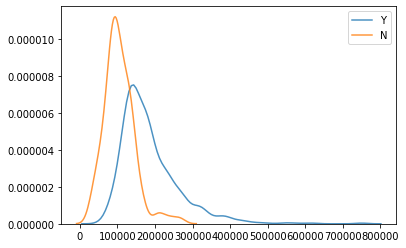

In [123]:
data_explore_pop(categorical1,'SalePrice', dummying)

In [124]:
dummying['CentralAir'] = dummying['CentralAir'].map({'N': 0, 'Y': 1})
dummying['CentralAir'].describe()

count    1449.000000
mean        0.934438
std         0.247601
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CentralAir, dtype: float64


Distribution of Categories of HeatingQC
           count      mean      std      min       25%       50%       75%       max
HeatingQC                                                                           
Po           1.0   87000.0      NaN  87000.0   87000.0   87000.0   87000.0   87000.0
Fa          49.0  123919.0  50307.0  37900.0   87000.0  123500.0  161000.0  235000.0
TA         427.0  142226.0  47197.0  34900.0  115000.0  135000.0  158450.0  375000.0
Gd         240.0  156815.0  53030.0  52000.0  121850.0  151700.0  179250.0  395000.0
Ex         732.0  214595.0  87456.0  66500.0  154000.0  194500.0  252170.0  755000.0 1

Distribution plot for sale prices by categorical variable for HeatingQC
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


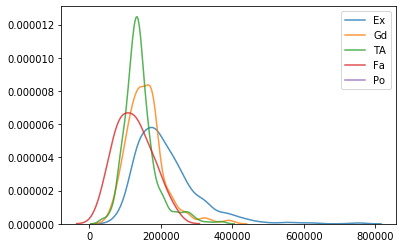

In [125]:
data_explore_pop(categorical1,'SalePrice', dummying)

In [126]:
map_cat('HeatingQC', dummying)

count    1449.000000
mean        4.140787
std         0.960289
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: HeatingQC, dtype: float64



Distribution of Categories of Heating
          count      mean      std       min       25%       50%       75%       max
Heating                                                                             
Floor       1.0   72500.0      NaN   72500.0   72500.0   72500.0   72500.0   72500.0
Grav        7.0   75271.0  28067.0   37900.0   56250.0   79000.0   88250.0  121000.0
Wall        4.0   92100.0   4510.0   87500.0   89375.0   91450.0   94175.0   98000.0
OthW        2.0  125750.0   5303.0  122000.0  123875.0  125750.0  127625.0  129500.0
GasW       18.0  166632.0  78548.0   82000.0  116375.0  134950.0  220000.0  375000.0
GasA     1417.0  181645.0  79141.0   34900.0  130250.0  163900.0  214000.0  755000.0 1

Distribution plot for sale prices by categorical variable for Heating
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125

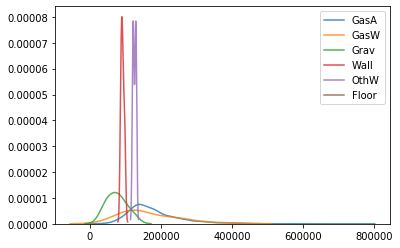

In [127]:
data_explore_pop(categorical1,'SalePrice', dummying)

In [128]:
def heat_map(x):
    if x == 'GasW':
        return 'Gas'
    elif x == 'GasA':
        return 'Gas'
    else:
        return 'Other'
dummying['Heating'] = dummying['Heating'].apply(heat_map)
dummying.groupby('Heating')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Heating,,,,,,,,
Gas,1435.0,181456.287108,79123.993021,34900.0,130000.0,163000.0,214000.0,755000.0
Other,14.0,87092.857143,26451.333085,37900.0,74125.0,88750.0,97625.0,129500.0


In [129]:
twotype_dummy('Gas', 'Heating', dummying)


Distribution of Categories of BsmtFinType2
               count      mean       std       min       25%       50%       75%       max
BsmtFinType2                                                                              
None            37.0  105653.0   29279.0   39300.0   90000.0  101800.0  118858.0  198500.0
BLQ             33.0  151101.0   41611.0   62383.0  129000.0  143000.0  172500.0  271900.0
LwQ             46.0  164364.0   43255.0   88000.0  134500.0  154000.0  179750.0  287000.0
Rec             54.0  164917.0   59183.0   85000.0  129000.0  148750.0  180175.0  402000.0
GLQ             14.0  180982.0   64573.0   75500.0  130250.0  203125.0  231500.0  270000.0
Unf           1246.0  184370.0   81188.0   34900.0  132000.0  165550.0  219500.0  755000.0
ALQ             19.0  209942.0  104765.0  123500.0  139000.0  174900.0  262500.0  555000.0 1

Distribution plot for sale prices by categorical variable for BsmtFinType2
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.12

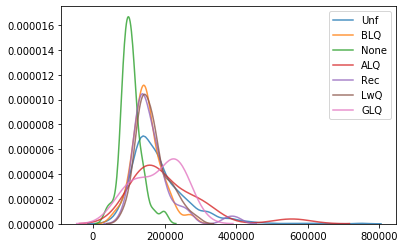

In [130]:
data_explore_pop(categorical1,'SalePrice',dummying)

In [131]:
dummying['HasBasement'] = dummying['BsmtFinType2'].apply(has_dummy)

In [132]:
#dropping finttype2
dummying.drop('BsmtFinType2', axis=1, inplace=True)


Distribution of Categories of BsmtFinType1
              count      mean      std      min       25%       50%       75%       max
BsmtFinType1                                                                           
None           37.0  105653.0  29279.0  39300.0   90000.0  101800.0  118858.0  198500.0
Rec           132.0  146482.0  45117.0  34900.0  122250.0  141500.0  161125.0  381000.0
BLQ           148.0  149494.0  47327.0  35311.0  122750.0  139100.0  163100.0  359100.0
LwQ            74.0  151853.0  50797.0  75500.0  119000.0  139000.0  179125.0  301000.0
ALQ           220.0  161573.0  50821.0  81000.0  129000.0  149250.0  179925.0  538000.0
Unf           426.0  170517.0  72888.0  37900.0  117625.0  160500.0  202624.0  582933.0
GLQ           412.0  234989.0  93122.0  80000.0  173000.0  213495.0  277125.0  755000.0 1

Distribution plot for sale prices by categorical variable for BsmtFinType1
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(

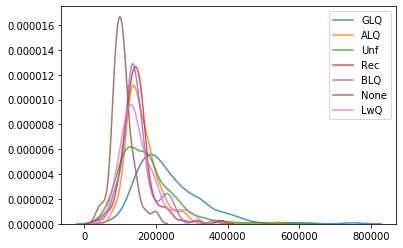

In [133]:
data_explore_pop(categorical1,'SalePrice',dummying)

In [134]:
means_test('BsmtFinType1', 'SalePrice', dummying)

F_onewayResult(statistic=63.650254195390744, pvalue=3.126373973671972e-70)



Distribution of Categories of BsmtExposure
              count      mean       std      min       25%       50%       75%       max
BsmtExposure                                                                            
None           37.0  105653.0   29279.0  39300.0   90000.0  101800.0  118858.0  198500.0
No            944.0  165242.0   60754.0  34900.0  125500.0  153500.0  190250.0  501837.0
Mn            114.0  192790.0   77335.0  78000.0  138822.0  182450.0  228092.0  475000.0
Av            221.0  206643.0   88656.0  35311.0  145000.0  185850.0  248900.0  745000.0
Gd            133.0  256131.0  117991.0  61000.0  171000.0  225000.0  315500.0  755000.0 1

Distribution plot for sale prices by categorical variable for BsmtExposure
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


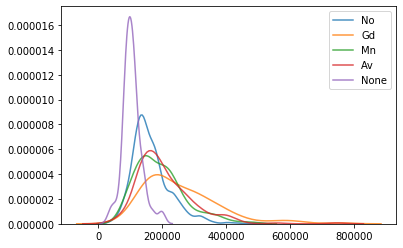

In [135]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [136]:
exposure_map = {'None': 0, 'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3}

In [137]:
dummying['BsmtExposure'] = dummying['BsmtExposure'].map(exposure_map)


Distribution of Categories of BsmtCond
           count      mean      std       min       25%       50%       75%       max
BsmtCond                                                                             
Po           2.0   64000.0   4243.0   61000.0   62500.0   64000.0   65500.0   67000.0
None        37.0  105653.0  29279.0   39300.0   90000.0  101800.0  118858.0  198500.0
Fa          45.0  121810.0  43468.0   55000.0   91500.0  118500.0  137900.0  265979.0
TA        1301.0  183452.0  79746.0   34900.0  132500.0  165000.0  215000.0  755000.0
Gd          64.0  209672.0  65916.0  119000.0  154625.0  193010.0  258890.0  402000.0 1

Distribution plot for sale prices by categorical variable for BsmtCond
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


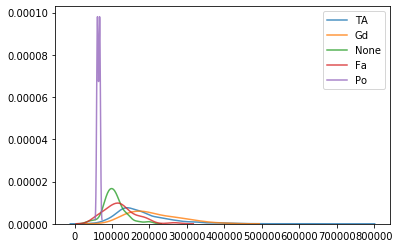

In [138]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [139]:
map_cat('BsmtCond', dummying)

count    1449.000000
mean        2.933747
std         0.553517
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: BsmtCond, dtype: float64



Distribution of Categories of BsmtQual
          count      mean       std       min       25%       50%       75%       max
BsmtQual                                                                             
None       37.0  105653.0   29279.0   39300.0   90000.0  101800.0  118858.0  198500.0
Fa         35.0  115692.0   34470.0   61000.0   91400.0  112000.0  133500.0  206900.0
TA        648.0  140667.0   43453.0   34900.0  117000.0  135500.0  157925.0  475000.0
Gd        609.0  202613.0   58379.0   75500.0  165000.0  192000.0  234000.0  538000.0
Ex        120.0  325891.0  113330.0  123500.0  254948.0  317500.0  377750.0  755000.0 1

Distribution plot for sale prices by categorical variable for BsmtQual
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


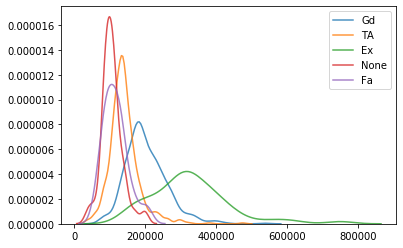

In [140]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [141]:
map_cat('BsmtQual', dummying)

count    1449.000000
mean        3.485162
std         0.877878
min         0.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: BsmtQual, dtype: float64


In [142]:
create_interaction('BsmtCond', 'BsmtQual', dummying)


Distribution of Categories of Foundation
            count      mean      std       min       25%       50%       75%       max
Foundation                                                                            
Slab         24.0  107366.0  34214.0   39300.0   89375.0  104150.0  118884.0  198500.0
BrkTil      146.0  132291.0  54592.0   37900.0  102400.0  125250.0  151250.0  475000.0
CBlock      634.0  149806.0  48295.0   34900.0  122125.0  141500.0  168000.0  402861.0
Stone         6.0  165959.0  78558.0  102776.0  109625.0  126500.0  233734.0  266500.0
Wood          3.0  185667.0  56695.0  143000.0  153500.0  164000.0  207000.0  250000.0
PConc       636.0  225139.0  86978.0   78000.0  172946.0  205000.0  262335.0  755000.0 1

Distribution plot for sale prices by categorical variable for Foundation
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
A

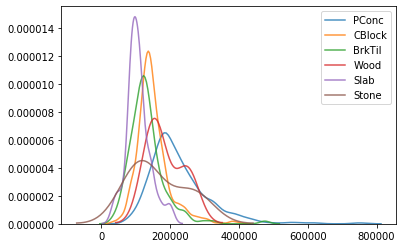

In [143]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of ExterCond
            count      mean       std       min       25%       50%       75%       max
ExterCond                                                                              
Po            1.0   76500.0       NaN   76500.0   76500.0   76500.0   76500.0   76500.0
Fa           28.0  102595.0   40094.0   39300.0   65500.0   95750.0  137750.0  169500.0
Gd          146.0  168898.0   72608.0   68400.0  128625.0  151250.0  187375.0  625000.0
TA         1271.0  183632.0   79686.0   34900.0  130500.0  165500.0  217168.0  755000.0
Ex            3.0  201333.0  109235.0  118000.0  139500.0  161000.0  243000.0  325000.0 1

Distribution plot for sale prices by categorical variable for ExterCond
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


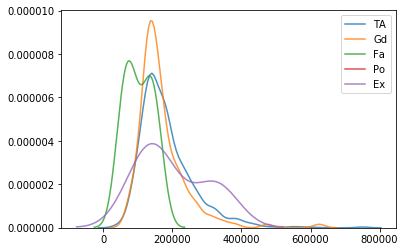

In [144]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [145]:
map_cat('ExterCond', dummying)

count    1449.000000
mean        3.084196
std         0.352309
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: ExterCond, dtype: float64



Distribution of Categories of ExterQual
           count      mean       std       min       25%       50%       75%       max
ExterQual                                                                             
Fa          14.0   87985.0   39827.0   39300.0   60250.0   82250.0  102000.0  200000.0
TA         905.0  144316.0   42488.0   34900.0  118500.0  139400.0  165500.0  381000.0
Gd         479.0  232012.0   71683.0   52000.0  185000.0  221000.0  266500.0  745000.0
Ex          51.0  365446.0  116730.0  160000.0  310936.0  361919.0  420649.0  755000.0 1

Distribution plot for sale prices by categorical variable for ExterQual
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


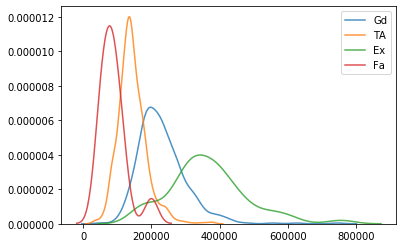

In [146]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [147]:
map_cat('ExterQual',dummying)

count    1449.000000
mean        3.391304
std         0.572825
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: ExterQual, dtype: float64


In [148]:
create_interaction('ExterCond','ExterQual', dummying)


Distribution of Categories of MasVnrType
            count      mean      std       min       25%       50%       75%       max
MasVnrType                                                                            
BrkCmn       15.0  146318.0  46188.0   89471.0  114250.0  139000.0  163950.0  277000.0
None        863.0  156209.0  60742.0   34900.0  118982.0  143000.0  182250.0  745000.0
BrkFace     443.0  204540.0  81308.0   75000.0  149150.0  181000.0  235500.0  755000.0
Stone       128.0  265584.0  99940.0  119000.0  194650.0  246839.0  312779.0  611657.0 1

Distribution plot for sale prices by categorical variable for MasVnrType
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


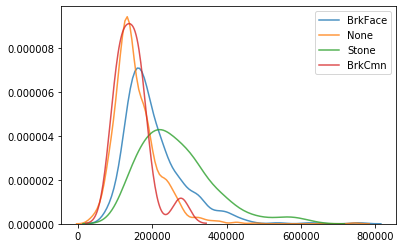

In [149]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of Exterior2nd
             count      mean       std       min       25%       50%       75%       max
Exterior2nd                                                                             
CBlock         1.0  105000.0       NaN  105000.0  105000.0  105000.0  105000.0  105000.0
AsbShng       20.0  114061.0   42315.0   35311.0   94000.0  111000.0  135500.0  225000.0
Brk Cmn        7.0  126714.0   38693.0   60000.0  114000.0  147000.0  148500.0  155000.0
AsphShn        3.0  138000.0   37510.0  100000.0  119500.0  139000.0  157000.0  175000.0
Stone          4.0  147625.0   68065.0   90000.0   92625.0  135250.0  190250.0  230000.0
Wd Sdng      197.0  148386.0   59893.0   34900.0  114500.0  138000.0  164900.0  475000.0
MetalSd      214.0  149803.0   55079.0   62383.0  118625.0  138750.0  164525.0  392000.0
Stucco        26.0  155905.0   74862.0   58500.0   92262.0  142000.0  197250.0  381000.0
Wd Shng       38.0  161329.0   88974.0   55000.0  117000.0  138225.

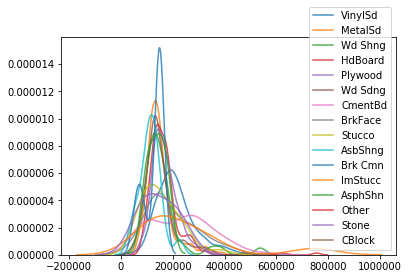

In [150]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [151]:
dummying.drop('Exterior2nd', axis=1, inplace=True)


Distribution of Categories of Exterior1st
             count      mean       std       min       25%       50%       75%       max
Exterior1st                                                                             
BrkComm        2.0   71000.0   15556.0   60000.0   65500.0   71000.0   76500.0   82000.0
AsphShn        1.0  100000.0       NaN  100000.0  100000.0  100000.0  100000.0  100000.0
CBlock         1.0  105000.0       NaN  105000.0  105000.0  105000.0  105000.0  105000.0
AsbShng       20.0  107386.0   33756.0   35311.0   85750.0  108000.0  133500.0  165500.0
MetalSd      220.0  149422.0   54776.0   62383.0  117750.0  139000.0  164775.0  392000.0
Wd Sdng      205.0  149594.0   71215.0   34900.0  112000.0  138887.0  165000.0  745000.0
WdShing       26.0  150655.0   72508.0   87000.0  109750.0  128700.0  160250.0  385000.0
Stucco        25.0  162990.0   83307.0   58500.0  116000.0  144000.0  188700.0  381000.0
HdBoard      222.0  163077.0   66306.0   83000.0  129625.0  149900.

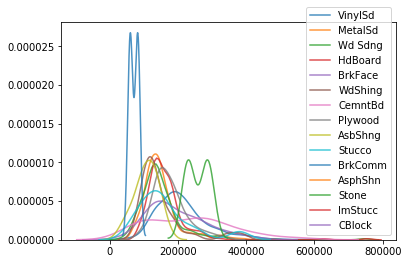

In [152]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of RoofMatl
           count      mean       std       min       25%       50%       75%       max
RoofMatl                                                                              
Roll         1.0  137000.0       NaN  137000.0  137000.0  137000.0  137000.0  137000.0
ClyTile      1.0  160000.0       NaN  160000.0  160000.0  160000.0  160000.0  160000.0
CompShg   1423.0  179412.0   77575.0   34900.0  129500.0  161000.0  212950.0  745000.0
Metal        1.0  180000.0       NaN  180000.0  180000.0  180000.0  180000.0  180000.0
Tar&Grv     11.0  185406.0   65430.0   82000.0  136000.0  167000.0  249000.0  274970.0
WdShake      5.0  241400.0   36219.0  190000.0  228000.0  242000.0  260000.0  287000.0
Membran      1.0  241500.0       NaN  241500.0  241500.0  241500.0  241500.0  241500.0
WdShngl      6.0  390250.0  206969.0  168500.0  278500.0  332500.0  452500.0  755000.0 1

Distribution plot for sale prices by categorical variable for RoofMatl
AxesSubplot(0.12

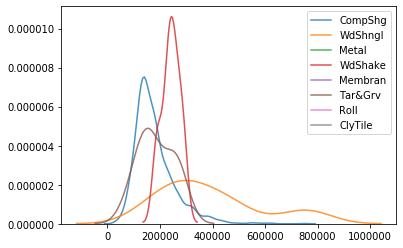

In [153]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [154]:
dummying.drop('RoofMatl', axis=1, inplace=True)


Distribution of Categories of RoofStyle
            count      mean       std       min       25%       50%       75%       max
RoofStyle                                                                              
Gambrel      11.0  148909.0   67014.0   40000.0  105500.0  139000.0  193750.0  259500.0
Gable      1131.0  170935.0   65901.0   34900.0  127500.0  159000.0  202150.0  755000.0
Mansard       7.0  180568.0   58058.0  100000.0  145500.0  175000.0  216000.0  265979.0
Flat         13.0  194690.0   62523.0   82000.0  143000.0  185000.0  242000.0  274970.0
Hip         285.0  218941.0  111741.0   55000.0  139600.0  176500.0  278000.0  745000.0
Shed          2.0  225000.0   49497.0  190000.0  207500.0  225000.0  242500.0  260000.0 1

Distribution plot for sale prices by categorical variable for RoofStyle
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.

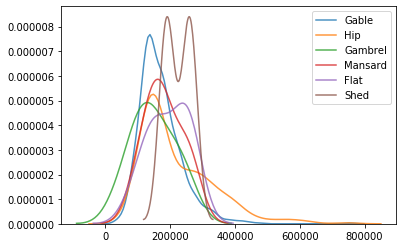

In [155]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [156]:
means_test('RoofStyle', 'SalePrice', dummying)

F_onewayResult(statistic=18.26181582578989, pvalue=1.3045179821756638e-17)



Distribution of Categories of HouseStyle
            count      mean       std       min       25%       50%       75%       max
HouseStyle                                                                             
1.5Unf       14.0  110150.0   19036.0   76000.0   98175.0  111250.0  120500.0  139400.0
SFoyer       37.0  135074.0   30481.0   75500.0  127500.0  135960.0  148000.0  206300.0
1.5Fin      154.0  143117.0   54278.0   37900.0  114625.0  132000.0  159326.0  410000.0
2.5Unf       11.0  157355.0   63934.0  101000.0  125000.0  133900.0  163500.0  325000.0
SLvl         64.0  166691.0   38608.0   91000.0  145000.0  164200.0  178475.0  345000.0
1Story      720.0  175346.0   76502.0   34900.0  126875.0  154000.0  209050.0  611657.0
2Story      441.0  210025.0   87721.0   40000.0  158900.0  190000.0  240000.0  755000.0
2.5Fin        8.0  220000.0  118212.0  104000.0  164250.0  194000.0  223750.0  475000.0 1

Distribution plot for sale prices by categorical variable for HouseStyle
Ax

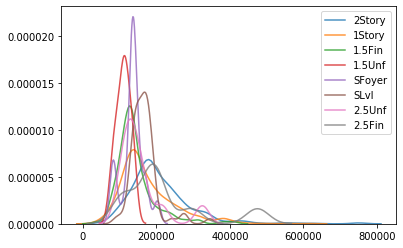

In [157]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of BldgType
           count      mean      std      min       25%       50%       75%       max
BldgType                                                                            
2fmCon      31.0  128432.0  35459.0  55000.0  106875.0  127500.0  142500.0  228950.0
Duplex      52.0  133541.0  27833.0  82000.0  118375.0  135980.0  145000.0  206300.0
Twnhs       43.0  135912.0  41013.0  75000.0   95750.0  137500.0  168750.0  230000.0
TwnhsE     113.0  181801.0  60872.0  75500.0  143000.0  171900.0  207500.0  392500.0
1Fam      1210.0  185368.0  82528.0  34900.0  131000.0  167000.0  222000.0  755000.0 1

Distribution plot for sale prices by categorical variable for BldgType
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


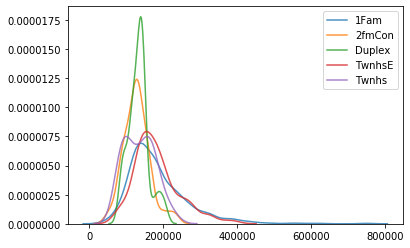

In [158]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of Condition2
             count      mean       std       min       25%       50%       75%       max
Condition2                                                                              
RRNn           2.0   96750.0   39952.0   68500.0   82625.0   96750.0  110875.0  125000.0
Artery         2.0  106500.0   16263.0   95000.0  100750.0  106500.0  112250.0  118000.0
Feedr          6.0  121167.0   33545.0   79500.0   95500.0  127500.0  137000.0  167500.0
RRAn           1.0  136905.0       NaN  136905.0  136905.0  136905.0  136905.0  136905.0
Norm        1434.0  180791.0   79214.0   34900.0  130000.0  162900.0  214000.0  755000.0
RRAe           1.0  190000.0       NaN  190000.0  190000.0  190000.0  190000.0  190000.0
PosN           2.0  284875.0  141598.0  184750.0  234812.0  284875.0  334938.0  385000.0
PosA           1.0  325000.0       NaN  325000.0  325000.0  325000.0  325000.0  325000.0 1

Distribution plot for sale prices by categorical variable for Con

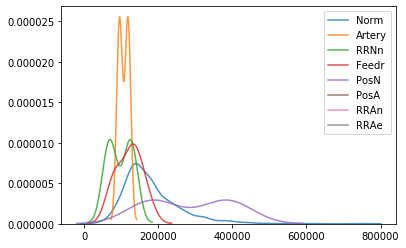

In [159]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [160]:
dummying.drop('Condition2', axis=1, inplace = True)


Distribution of Categories of Condition1
             count      mean      std       min       25%       50%       75%       max
Condition1                                                                             
Artery        48.0  135092.0  66227.0   66500.0  105000.0  119550.0  143000.0  475000.0
RRAe          11.0  138400.0  24031.0   87000.0  127750.0  142500.0  156500.0  171000.0
Feedr         81.0  142475.0  42157.0   40000.0  121600.0  140000.0  167500.0  244600.0
Norm        1249.0  184090.0  81152.0   34900.0  131000.0  165400.0  219500.0  755000.0
RRAn          26.0  184397.0  66178.0   79500.0  152394.0  171495.0  190105.0  423000.0
RRNe           2.0  190750.0   5303.0  187000.0  188875.0  190750.0  192625.0  194500.0
RRNn           5.0  212400.0  93823.0  110000.0  128000.0  214000.0  290000.0  320000.0
PosN          19.0  215184.0  65257.0  109500.0  167250.0  200000.0  252250.0  385000.0
PosA           8.0  225875.0  52349.0  180000.0  188750.0  212500.0  244000.0 

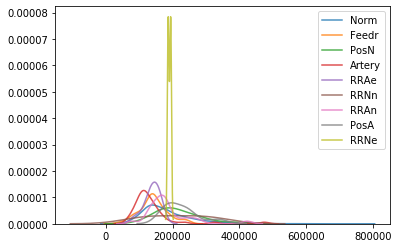

In [161]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [162]:
def cond_map(x):
    if 'RR' in x:
        return 'RR'
    if 'Pos' in x:
        return 'Pos'
    else:
        return x

In [163]:
dummying['Condition1'] = dummying['Condition1'].apply(cond_map)


Distribution of Categories of Neighborhood
              count      mean       std       min       25%       50%       75%       max
Neighborhood                                                                             
MeadowV        17.0   98576.0   23491.0   75000.0   83500.0   88000.0  115000.0  151400.0
IDOTRR         37.0  100124.0   33377.0   34900.0   81000.0  103000.0  120500.0  169500.0
BrDale         16.0  104494.0   14330.0   83000.0   91000.0  106000.0  118000.0  125000.0
BrkSide        58.0  124834.0   40349.0   39300.0  100500.0  124300.0  141175.0  223500.0
Edwards       100.0  128220.0   43209.0   58500.0  101500.0  121750.0  145225.0  320000.0
OldTown       113.0  128225.0   52651.0   37900.0  105900.0  119000.0  140000.0  475000.0
Sawyer         74.0  136793.0   22345.0   62383.0  127250.0  135000.0  149462.0  190000.0
Blueste         2.0  137500.0   19092.0  124000.0  130750.0  137500.0  144250.0  151000.0
SWISU          25.0  142591.0   32623.0   60000.0  12800

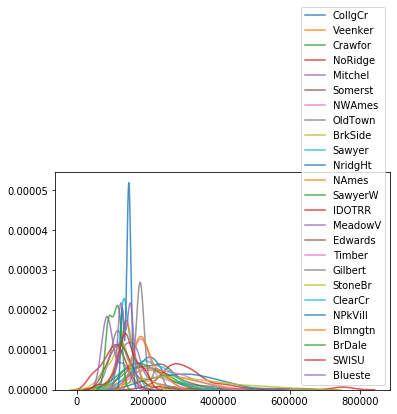

In [164]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of LandSlope
            count      mean      std      min       25%       50%       75%       max
LandSlope                                                                            
Gtl        1371.0  179551.0  78527.0  34900.0  129700.0  160200.0  212000.0  755000.0
Mod          65.0  196734.0  92375.0  39300.0  130000.0  186700.0  259500.0  538000.0
Sev          13.0  204379.0  86730.0  61000.0  143000.0  185000.0  260000.0  375000.0 1

Distribution plot for sale prices by categorical variable for LandSlope
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


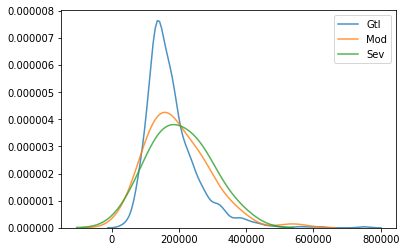

In [165]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [166]:
twotype_dummy('Gtl', 'LandSlope', dummying)


Distribution of Categories of LotConfig
            count      mean      std       min       25%       50%       75%       max
LotConfig                                                                             
Inside     1043.0  176400.0  76118.0   34900.0  127750.0  159000.0  206600.0  611657.0
FR2          47.0  177935.0  62789.0   81000.0  143500.0  165000.0  194500.0  394617.0
Corner      262.0  181622.0  84628.0   52500.0  129125.0  160000.0  220000.0  755000.0
FR3           4.0  208475.0  78379.0  128000.0  169925.0  195450.0  234000.0  315000.0
CulDSac      93.0  224104.0  93591.0   84000.0  156000.0  197900.0  269790.0  625000.0 1

Distribution plot for sale prices by categorical variable for LotConfig
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


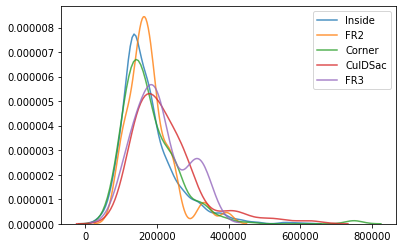

In [167]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of Utilities
            count      mean      std       min       25%       50%       75%       max
Utilities                                                                             
NoSeWa        1.0  137500.0      NaN  137500.0  137500.0  137500.0  137500.0  137500.0
AllPub     1448.0  180574.0  79339.0   34900.0  129900.0  162250.0  214000.0  755000.0 1

Distribution plot for sale prices by categorical variable for Utilities
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


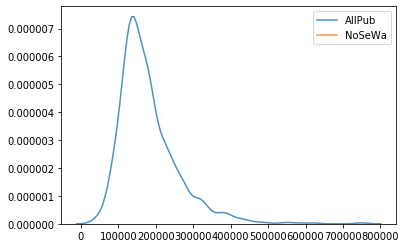

In [168]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [169]:
dummying.drop('Utilities', axis=1, inplace=True)


Distribution of Categories of LandContour
              count      mean       std      min       25%       50%       75%       max
LandContour                                                                             
Bnk            63.0  143104.0   49361.0  52500.0  113000.0  139400.0  171250.0  315000.0
Lvl          1300.0  179758.0   78312.0  34900.0  129900.0  162000.0  211250.0  755000.0
Low            36.0  203661.0   83935.0  39300.0  143000.0  190000.0  263750.0  385000.0
HLS            50.0  231534.0  101790.0  82500.0  151750.0  222250.0  281347.0  538000.0 1

Distribution plot for sale prices by categorical variable for LandContour
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


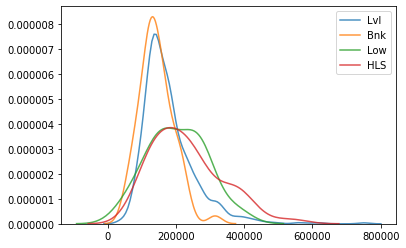

In [170]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of LotShape
          count      mean      std       min       25%       50%       75%       max
LotShape                                                                            
Reg       918.0  164204.0  69149.0   34900.0  120000.0  145000.0  187375.0  582933.0
IR1       480.0  205992.0  86140.0   52000.0  150000.0  188600.0  239000.0  755000.0
IR3        10.0  216036.0  82540.0   73000.0  167875.0  203570.0  265000.0  375000.0
IR2        41.0  239833.0  99669.0  110000.0  175000.0  221000.0  250000.0  538000.0 1

Distribution plot for sale prices by categorical variable for LotShape
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


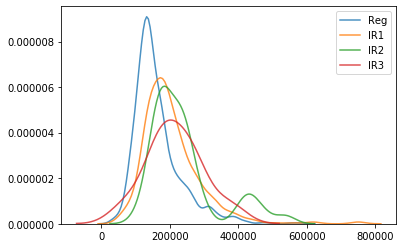

In [171]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [172]:
twotype_dummy('Reg', 'LotShape', dummying)


Distribution of Categories of Alley
        count      mean      std      min       25%       50%       75%       max
Alley                                                                            
Grvl     50.0  122219.0  34781.0  52500.0  105312.0  119500.0  136750.0  256000.0
Pave     40.0  167203.0  38514.0  40000.0  151000.0  172200.0  185000.0  265979.0
None   1359.0  183083.0  80532.0  34900.0  130125.0  165000.0  217250.0  755000.0 1

Distribution plot for sale prices by categorical variable for Alley
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


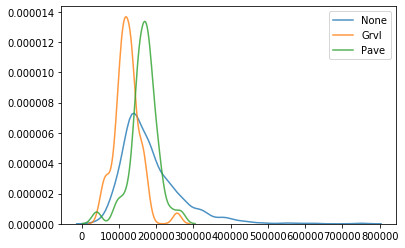

In [173]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of Street
         count      mean      std      min       25%       50%       75%       max
Street                                                                            
Grvl       6.0  130190.0  65446.0  55993.0   88250.0  114250.0  169650.0  228950.0
Pave    1443.0  180754.0  79324.0  34900.0  129950.0  162500.0  214000.0  755000.0 1

Distribution plot for sale prices by categorical variable for Street
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


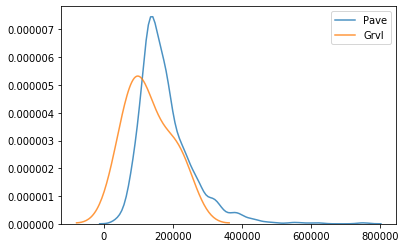

In [174]:
data_explore_pop(categorical1, 'SalePrice', dummying)


Distribution of Categories of MSZoning
           count      mean      std       min       25%       50%       75%       max
MSZoning                                                                             
C (all)     10.0   74528.0  33791.0   34900.0   43998.0   74700.0   98332.0  133900.0
RM         218.0  126317.0  48522.0   37900.0  100000.0  120500.0  140000.0  475000.0
RH          16.0  131558.0  35714.0   76000.0  106150.0  136500.0  148608.0  200000.0
RL        1143.0  190638.0  80576.0   39300.0  137500.0  173900.0  224250.0  755000.0
FV          62.0  214888.0  53437.0  144152.0  173800.0  207900.0  250000.0  370878.0 1

Distribution plot for sale prices by categorical variable for MSZoning
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


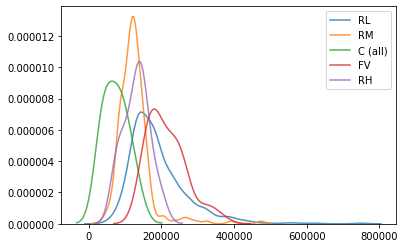

In [175]:
data_explore_pop(categorical1, 'SalePrice', dummying)

In [176]:
data_explore_pop(categorical1, 'SalePrice', dummying)

List is empty.


In [177]:
dummying.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass                1449 non-null int64
MSZoning                  1449 non-null object
LotArea                   1449 non-null int64
Street                    1449 non-null object
Alley                     1449 non-null object
LandContour               1449 non-null object
LotConfig                 1449 non-null object
Neighborhood              1449 non-null object
Condition1                1449 non-null object
BldgType                  1449 non-null object
HouseStyle                1449 non-null object
OverallQual               1449 non-null int64
OverallCond               1449 non-null int64
YearBuilt                 1449 non-null int64
YearRemodAdd              1449 non-null int64
RoofStyle                 1449 non-null object
Exterior1st               1449 non-null object
MasVnrType                1449 non-null object
MasVnrArea                1449 non-null float64
Exter

In [178]:
create_interaction('OverallQual','OverallCond', dummying)

In [179]:
dummying.to_csv('cleaned.csv')

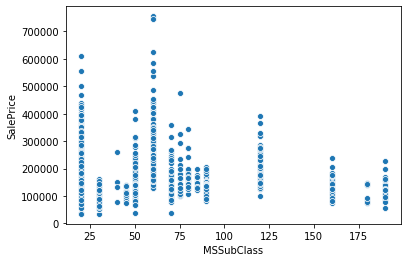

In [180]:
# time to do some more exploratory analysis
sns.scatterplot(x=dummying['MSSubClass'], y=dummying['SalePrice'])

In [181]:
time_var = ['YearBuilt','YearRemodAdd','YrSold','MoSold','GarageYrBlt','SalePrice']

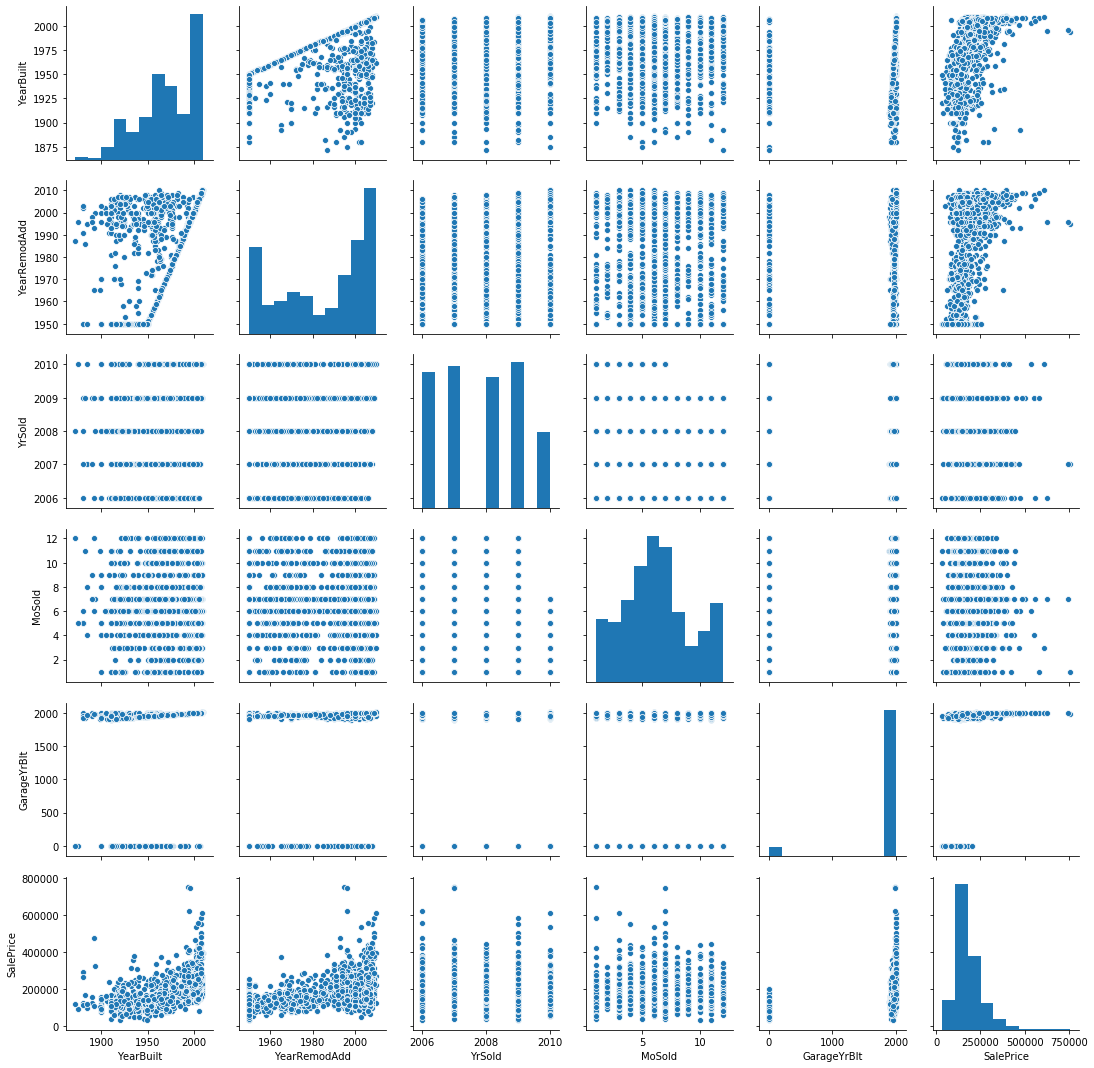

In [182]:
sns.pairplot(dummying[time_var])

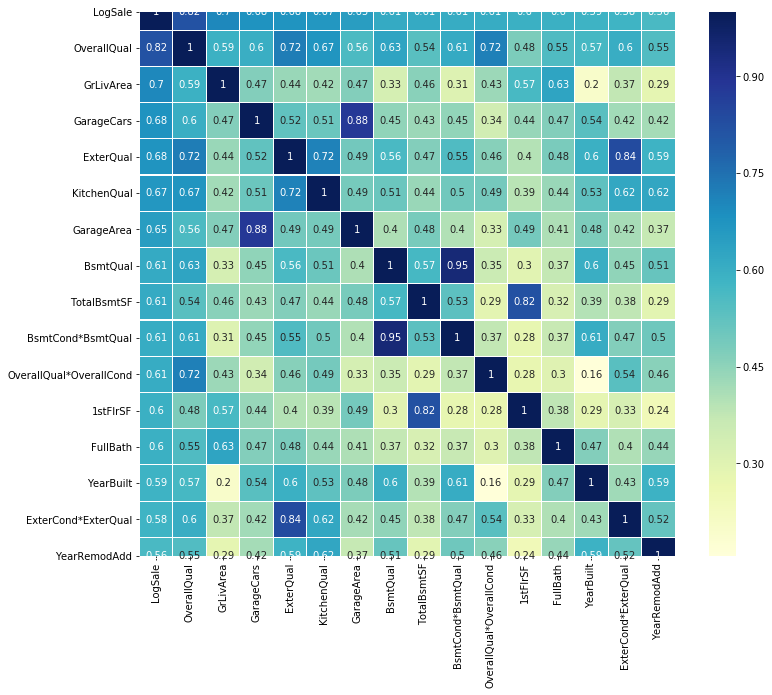

In [183]:
# using heat matrix to get a quick idea of the most important variables
# specific variable correlation matrix
# k is number of top variables
k = 16
cols = train_houses.drop('SalePrice', axis = 1).corr().nlargest(k, 'LogSale')['LogSale'].index 
  
cm = np.corrcoef(train_houses[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values,
           annot = True) 

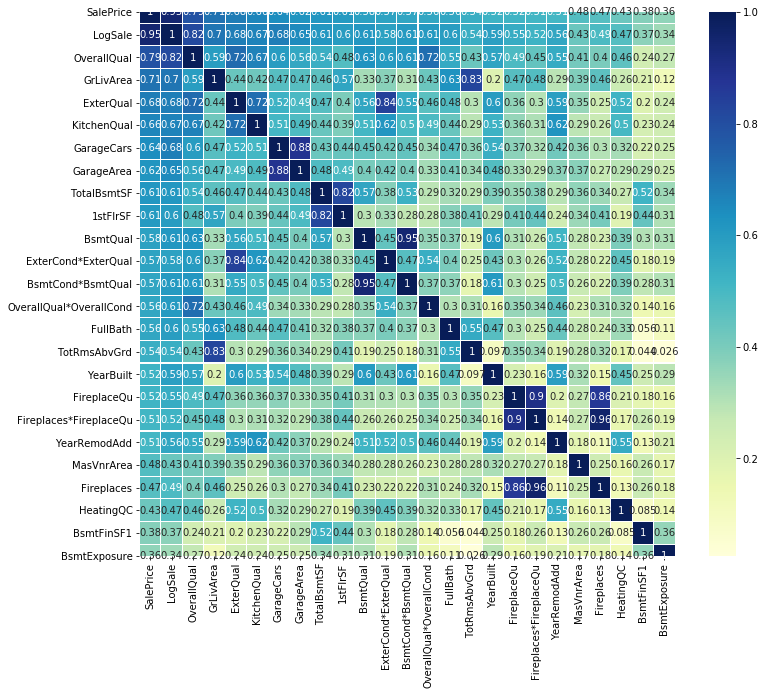

In [184]:
# redoing correlation matrix with cleaned variables to see if there are any changes
# specific variable correlation matrix
# k is number of top variables
k = 25
cols = dummying.corr().nlargest(k, 'SalePrice')['SalePrice'].index 
  
cm = np.corrcoef(dummying[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values,
           annot = True) 

In [185]:
dummying[dummying['TotalBsmtSF'] == dummying['1stFlrSF']]['TotalBsmtSF'].count()

735

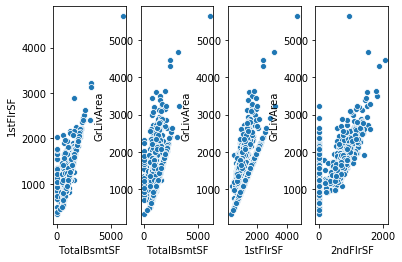

In [186]:
fig, ax = plt.subplots(nrows=1,ncols=4)
sns.scatterplot(x='TotalBsmtSF', y = '1stFlrSF', data = dummying, ax = ax[0])
sns.scatterplot(x='TotalBsmtSF', y = 'GrLivArea', data = dummying, ax = ax[1])
sns.scatterplot(x='1stFlrSF', y = 'GrLivArea', data = dummying, ax = ax[2])
sns.scatterplot(x='2ndFlrSF', y = 'GrLivArea', data = dummying, ax = ax[3])

In [187]:
print(dummying[dummying['TotalBsmtSF'] == dummying['1stFlrSF']]['TotalBsmtSF'].count())
print(dummying[dummying['TotalBsmtSF'] == dummying['GrLivArea']]['TotalBsmtSF'].count())
print()
print(dummying[dummying['1stFlrSF'] == dummying['GrLivArea'] & dummying['TotalBsmtSF']]['TotalBsmtSF'].count())

735
455

465
